LOGISTIC REGRATION MODEL

Logistic regration model is used for classification prediction



We take titanic data set and predict the passanger survived or not  using logistic regration model

This is a typical dataset used to teach how to perform logistic regression to predict whether a passenger survived or not during the ill-fated voyage of the Titanic







Feature

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

-name Name

-sex Sex

-age Age

-sibsp Number of Siblings/Spouses Aboard

-parch Number of Parents/Children Aboard

-ticket Ticket Number

-fare Passenger Fare (British pound)

-cabin Cabin

-embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Target


-survival Survival (0 = No; 1 = Yes)

Steps to bulid the classifiacation model

EDA


Step 2: Feature engineering

Step 3: Feauture Selection

Step 4:MODLE creation

step 5: model evaluation

step 6 :Prediction

In [3]:

#import the Needed libraries
#numpy for  numerical computation
#pandas for data frame and feature engineering
#matplot.pyplot and seaborn used for visulaization purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:

# load the titanic data set 
#Using pandas to load the data set 

df  = pd.read_csv("titanic_dataset.csv")



In [5]:
#view the data set 
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Step 1:EDA

In [6]:
#gather the information about the data set 
#using pandas to get the information about the data set 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


1309 rows and 12 columns  in the data set


In [7]:
#view the top 5  rows in the data set 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#view the last 5 rows in the dataset

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [17]:
df.columns.value_counts()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          1
Embarked       1
dtype: int64

In [9]:
#view the columns name in the data set 

df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [14]:
#caputure the details about the survive columns or Targeted column

df['Survived']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [16]:
#count of the survived 

df["Survived"].value_counts()

0    815
1    494
Name: Survived, dtype: int64

0 means not survived, and 1 means survived 

815 persons are survived .and 494 persons are not servivied

In [18]:
#filter the result mens and womans survived no 

pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,385
male,734,109


734 mens are not survived and 109 mens are survived 

81 womans are not servived and 385 womans survives 


Filter the Womans records only 

In [19]:
#Servived and not servived at gender level 

woman = df[df['Sex'] == "female"]



In [20]:
woman

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


filter the womans record with womans servived and not servived 

In [21]:
woman_servived = woman[woman['Survived'] == 1]

In [22]:
woman_servived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


Not Servived Womans 

In [23]:
woman_not_servived = woman[woman["Survived"] == 0]

In [24]:
woman_not_servived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Filter data set to male 

In [25]:
male  = df[df["Sex"] == "male"]

In [26]:
male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
male_survived = male[male["Survived"] == 1]


In [28]:
male_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [29]:
male_not_survived = male[male["Survived"] == 0]

male_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Visualization of the data 

Womans data

Plot woman servived and age  and not servived and age 

/tmp/ipykernel_5120/2999004152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(woman_servived.Age,bins=5,kde=False,label="woman_servived Respect with age ")
/tmp/ipykernel_5120/2999004152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(woman_not_servived.Age,bins=5,kde=False,label="woman

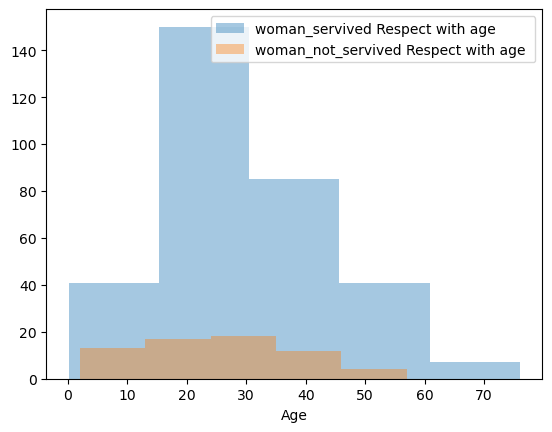

In [32]:
sns.distplot(woman_servived.Age,bins=5,kde=False,label="woman_servived Respect with age ")
sns.distplot(woman_not_servived.Age,bins=5,kde=False,label="woman_not_servived Respect with age ")
plt.legend()
plt.show()

Most of the servived Womans are 15 to 32 age womans

AND MALE 

/tmp/ipykernel_5120/1412694841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_survived.Age,kde=False,bins=5,label="Mens_Servived age ")
/tmp/ipykernel_5120/1412694841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_not_survived.Age,kde=False,bins=5,label="Men not servival age 

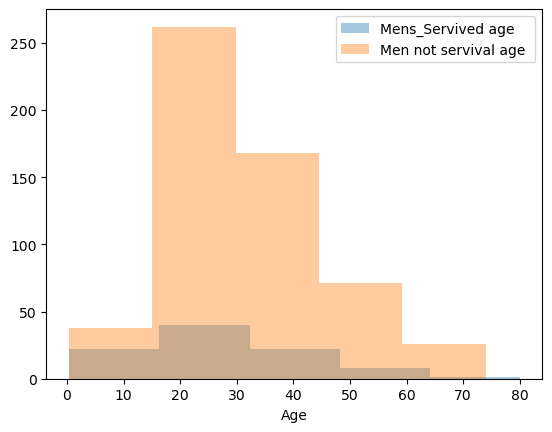

In [34]:
sns.distplot(male_survived.Age,kde=False,bins=5,label="Mens_Servived age ")
sns.distplot(male_not_survived.Age,kde=False,bins=5,label="Men not servival age ")

plt.legend()
plt.show()

most of the not served mens age is 19 to 35 age male

STEP 2: FEATURER ENGINEERING 

HANDLEING THE "NAN" VALUES IN THE DATA SET

In [36]:
#no of columns in the dataset 

len(list(df.columns.values))

12

12 Columns in the data set

In [37]:
df.columns.value_counts()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          1
Embarked       1
dtype: int64

In [39]:
#find the null values or NAN in data set

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [40]:
#count of the null or NAN values in the data set 

df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

cabin has a high null value . we can simply drop the cabin ,because it not use to predict

In [42]:
df.shape

(1309, 12)

In [52]:
#Drop the cabin column in the data Frame 
df.drop(['Cabin'],axis=1,inplace=True)

In [49]:
df.shape

(1309, 11)

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

next take the Embarked column nan value 

In [55]:
#Fill the EMbarked with S value 
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [58]:
#Highest is S so fill the null value with S

df['Embarked'] = df['Embarked'].fillna("S")

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [65]:
#Next Age colums 

#calulate mean age 

mean_age  = df['Age'].mean()

mean_age



29.881137667304014

In [64]:
#Calulate standared diviation

std_age = df["Age"].std()
std_age

14.413493211271334

Calculate the minimum age and Maximum age Using standared diviation and mean 


In [66]:
minmum_age  = mean_age - std_age

minmum_age

15.46764445603268

In [67]:
Max_age = mean_age + std_age
Max_age

44.29463087857535

In [69]:
#Genrate the random age to fil the null value in the data set 
#fill 263 null place with random age so 
random_age = np.random.randint(15,55,263)
random_age

array([28, 32, 52, 47, 45, 53, 47, 27, 40, 28, 35, 26, 24, 17, 31, 38, 35,
       29, 30, 53, 31, 21, 22, 50, 39, 49, 39, 29, 28, 46, 44, 32, 33, 41,
       52, 40, 43, 54, 20, 23, 24, 31, 31, 17, 33, 42, 32, 23, 31, 33, 25,
       16, 31, 40, 37, 34, 24, 32, 43, 51, 16, 15, 27, 51, 22, 22, 22, 46,
       54, 44, 23, 45, 15, 47, 31, 41, 25, 39, 43, 42, 54, 30, 44, 26, 52,
       42, 23, 36, 36, 40, 36, 26, 29, 15, 51, 26, 18, 47, 47, 28, 42, 52,
       47, 17, 31, 45, 15, 30, 52, 30, 54, 35, 47, 36, 40, 49, 25, 26, 24,
       51, 42, 29, 51, 24, 49, 26, 37, 52, 45, 45, 40, 52, 26, 48, 29, 19,
       48, 30, 49, 39, 29, 49, 24, 41, 35, 24, 30, 18, 50, 39, 39, 36, 30,
       52, 32, 44, 47, 22, 53, 27, 22, 31, 27, 50, 24, 27, 17, 28, 54, 36,
       20, 32, 25, 30, 24, 19, 40, 46, 18, 24, 44, 25, 16, 38, 39, 53, 26,
       46, 21, 26, 52, 51, 29, 31, 27, 21, 18, 43, 29, 46, 37, 30, 49, 23,
       42, 50, 43, 23, 31, 15, 45, 16, 52, 17, 29, 28, 15, 22, 42, 46, 18,
       27, 52, 41, 19, 30

In [70]:
#fill the nan value with random_age 

#Copy the age because the add the random age with array 

age_arr = df['Age'].copy()

age_arr


0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [72]:
np.isnan(age_arr)

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Age, Length: 1309, dtype: bool

In [73]:
np.isnan(age_arr)

0

In [71]:
#fill the nan value in the age_arr with the random age 

age_arr[np.isnan(age_arr)] = random_age

In [74]:
age_arr

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    21.0
1305    39.0
1306    38.5
1307    54.0
1308    42.0
Name: Age, Length: 1309, dtype: float64

In [75]:
#Assign this array to the age column in the data set 

df['Age'] = age_arr

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [60]:
#Next Fare 

df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [78]:
#simply Drop the row 

df.dropna(inplace=True)



In [79]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the record has no NAN values

VARABLE TRANFERMATION

the model doesn't recognize the sting type .

so  perform varable tranfermation


In [80]:
#gender column

In [81]:

#perform lable encodeing 
df['Sex'] = df['Sex'].map({"male":"0","female":"1"})

In [82]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,21.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,54.0,0,0,359309,8.0500,S


variable tranfermation in Embarked column

In [83]:
df["Embarked"].values

array(['S', 'C', 'S', ..., 'S', 'S', 'C'], dtype=object)

In [86]:
#perform onehotencoding 

Embarked = pd.get_dummies(df['Embarked'],drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


Drop the unwanted columns to predict 

Name  - is not use to predict, so drop it.

Ticket - this also not use to predict drop it.

passenger Id - not use drop it.

Emabarked - we Create the new Embarked column useing onehotencode ,so drop it.

In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",0,21.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",0,54.0,0,0,359309,8.0500,S


In [91]:
df.drop(["Name","PassengerId","Ticket","Embarked"],axis=1,inplace=True)

In [92]:
#view the Updated dataFrame

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,0,3,0,21.0,0,0,8.0500
1305,1,1,1,39.0,0,0,108.9000
1306,0,3,0,38.5,0,0,7.2500
1307,0,3,0,54.0,0,0,8.0500


In [93]:
#merge the created Embarked column to the Updated data frame

df  = pd.concat([df,Embarked],axis=1)

In [94]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,0,21.0,0,0,8.0500,0,1
1305,1,1,1,39.0,0,0,108.9000,0,0
1306,0,3,0,38.5,0,0,7.2500,0,1
1307,0,3,0,54.0,0,0,8.0500,0,1


check the from to built the model

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Sex       1308 non-null   object 
 3   Age       1308 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Parch     1308 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Q         1308 non-null   uint8  
 8   S         1308 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(2)
memory usage: 116.6+ KB


In [96]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

In [97]:
df.corr()

/tmp/ipykernel_5120/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.264342,-0.058769,0.002086,0.108688,0.233622,0.040769,-0.132682
Pclass,-0.264342,1.000000,-0.320945,0.061162,0.018615,-0.558629,0.230770,0.090938
Age,-0.058769,-0.320945,1.000000,-0.179373,-0.133631,0.144514,0.016217,-0.079278
SibSp,0.002086,0.061162,-0.179373,1.000000,0.373485,0.160238,-0.048802,0.073968
Parch,0.108688,0.018615,-0.133631,0.373485,1.000000,0.221539,-0.101065,0.072121
Fare,0.233622,-0.558629,0.144514,0.160238,0.221539,1.000000,-0.130059,-0.169922
Q,0.040769,0.230770,0.016217,-0.048802,-0.101065,-0.130059,1.000000,-0.491595
S,-0.132682,0.090938,-0.079278,0.073968,0.072121,-0.169922,-0.491595,1.000000


Model Buliding 

Create the indepantant and depantent value or variables 

In [98]:
#Create the X or indepentant feature 

X = df.drop("Survived",axis=1)

In [99]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
1304,3,0,21.0,0,0,8.0500,0,1
1305,1,1,39.0,0,0,108.9000,0,0
1306,3,0,38.5,0,0,7.2500,0,1
1307,3,0,54.0,0,0,8.0500,0,1


In [102]:
#Targeted feature or Depantent Feature 
y  = df['Survived']

In [103]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1308, dtype: int64

In [104]:
#BUlid the model 
#import the libraries
#import lib to train test data split 
from sklearn.linear_model import  LogisticRegression

from sklearn.model_selection import train_test_split


In [120]:
#crate the test ,train data

x_train,x_test ,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)


In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(915, 8)
(393, 8)
(915,)
(393,)


In [122]:
#create the object for the model
# Train the model using the train data

model = LogisticRegression(max_iter=500)



In [123]:
#train model

model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [124]:
predict_y = model.predict(x_test)

In [125]:
predict_y.shape

(393,)

In [126]:
predict_y

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [127]:
y_test

1013    1
1049    0
695     0
736     0
723     0
       ..
325     1
916     0
532     0
679     1
513     1
Name: Survived, Length: 393, dtype: int64

In [116]:
#evaluate the model performance 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [128]:
#Calculate the accuracy of the model 

acc_score = accuracy_score(y_test,predict_y)

acc_score

0.8447837150127226

82% accuracy 

only the balanced data set take the accuracy value to evaluate 


In [129]:
#confussion matrix

confusion_matrix(y_test,predict_y)

array([[215,  25],
       [ 36, 117]])

array structure is [[True positive, false Positive]
                     [false nagative,truenagative ]                               ]

The model predict .



214-> 1 survived : model->survived 26 -> 0 Not survived : model->survived.

117-> 0 Not survived : model->Not survived 36-> 1 survived : model -> Not Survived.




In [131]:
clr = classification_report(y_test,predict_y)

print(clr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       240
           1       0.82      0.76      0.79       153

    accuracy                           0.84       393
   macro avg       0.84      0.83      0.83       393
weighted avg       0.84      0.84      0.84       393



In [132]:
y_test.values

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [134]:
y_test.value_counts()

0    240
1    153
Name: Survived, dtype: int64

In [135]:
print("0",(predict_y==0).sum())
print("1",(predict_y == 1 ).sum())

0 251
1 142


MAKE PREDICTION USING THE MODEL 


Prediction for JACK

In [138]:
x_test.iloc[0]

Pclass        1
Sex           1
Age        35.0
SibSp         1
Parch         0
Fare      57.75
Q             0
S             0
Name: 1013, dtype: object

In [140]:
#calculate the forch value to test
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

Maximum 1st class ticket cost is  512.3292.

maximum 2nd class tickek cost is 73.5000.

maximum 3nd class tickek cost is 69.5500.

In [141]:
Jack = [[2,0,22,0,0,73.5000,0,1]]

In [142]:
model.predict(Jack)

/home/saaho/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Model predict Jack is not servived 

Prediction for rose


In [145]:
rose=[[1,1,22,1,1,512.3292,0,1]]


In [146]:
model.predict(rose)

/home/saaho/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Model predict the Rose is Servived 

IF yo

Prediction for Mr. Owen Harris Braund 

In [153]:
Mr_Owen_Harris_Braund  = [[3,0,22,1,0,73.5000,0,1]]
Mrs_John_Bradley_Cumings= [[1,1,38,1,0,512.3292,1,0]]




Make prediction for Mr_Owen_Harris_Braund 

In [154]:
model.predict(Mr_Owen_Harris_Braund )

/home/saaho/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Model predict he is not servived 

In [155]:
model.predict(Mrs_John_Bradley_Cumings)

/home/saaho/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Model predict she is Servived 

"If You Want More Prediction .Using The FOllowing Data "

| PassengerId | Pclass | Name                                               | Sex    | Age  | SibSp | Parch | Ticket           | Fare    | Cabin  | Embarked |
|-------------|--------|----------------------------------------------------|--------|------|-------|-------|------------------|---------|--------|----------|
| 1           | 3      | Mr. Owen Harris Braund                            | male   | 22   | 1     | 0     | A/5 21171        | 7.25    |        | S        |
| 2           | 1      | Mrs. John Bradley (Florence Briggs Thayer) Cumings | female | 38   | 1     | 0     | PC 17599         | 71.2833 | C85    | C        |
| 3           | 3      | Miss. Laina Heikkinen                             | female | 26   | 0     | 0     | STON/O2. 3101282 | 7.925   |        | S        |
| 4           | 1      | Mrs. Jacques Heath (Lily May Peel) Futrelle       | female | 35   | 1     | 0     | 113803           | 53.1    | C123   | S        |
| 5           | 3      | Mr. William Henry Allen                            | male   | 35   | 0     | 0     | 373450           | 8.05    |        | S        |

Save the model 

In [172]:
import pickle



In [159]:
path = "titanic_model.pkl"

In [162]:

with open(path, 'wb') as file:
    pickle.dump(model, file)

#the model was saved 

In [174]:
#load the Model 
import pickle
path = "titanic_model.pkl"
with open(path,'rb') as file:
    load_model = pickle.load(file=file)

In [175]:
load_model.predict(Jack)

/home/saaho/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])